# Anomaly Detection:  Network Traffic Data

This is the data set used for a competition. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between “bad” connections, called intrusions or attacks, and “good” normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label. The label just has two values (1 for normal data and -1 for anomalies).


In [2]:
import numpy as np
import pandas as pd

In [3]:
import math
from matplotlib import pyplot as plt

# Pre-processing
from sklearn import preprocessing

# Anomaly Detection
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
data2=pd.read_csv('data/network-traffic-analysis/kddcup99.csv')
data2

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Feature 37,Feature 38,Label
0,0.000000,3.370000e-07,0.000049,0,0.0,0,0.0,0.0,1,0.0,...,0.858824,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,1
1,0.000000,3.480000e-07,0.000050,0,0.0,0,0.0,0.0,1,0.0,...,0.898039,1.0,0.0,0.01,0.03,0.0,0.00,0.0,0.0,1
2,0.000000,3.420000e-07,0.000328,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.10,0.05,0.0,0.00,0.0,0.0,1
3,0.000000,4.280000e-07,0.000388,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.00,0.01,0.0,0.00,0.0,0.0,1
4,0.000000,2.900000e-07,0.000664,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,0.002057,4.020000e-07,0.000033,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.03,0.07,0.0,0.00,0.0,0.0,1
6961,0.000000,3.970000e-07,0.000048,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.50,0.08,0.0,0.00,0.0,0.0,1
6962,0.000000,4.700000e-07,0.000904,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.04,0.10,0.0,0.00,0.0,0.0,1
6963,0.000000,3.490000e-07,0.001371,0,0.0,0,0.0,0.0,1,0.0,...,1.000000,1.0,0.0,0.02,0.05,0.0,0.00,0.0,0.0,1


In [5]:
set(data2['Label'])

{'-1', '1', 'f'}

In [6]:
#Dropping the row with 'f' because we need to vcalculate anomaly
indexNames = data2[data2['Label'] == 'f'].index
data2.drop(indexNames , inplace=True)
data2.shape

(6964, 39)

In [7]:
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [8]:
# Specifying features and target attribute
X = data2.drop(['Label'], axis=1)

#Preprocessing and scaling 
scaler = preprocessing.MinMaxScaler()
X_data2 = X.values
X_scaled = scaler.fit_transform(X_data2)
X = X_scaled

y = data2['Label'].values

In [9]:
#Normalizing data
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X = norm.fit_transform(X)

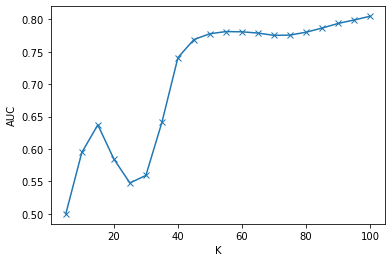

In [11]:
# Try different values of k ('n_neighbors' parameter) for LOF to identify a good one. Plot the relationship for k changing from 5 to 50 with 5 as the step.

auc_scores = []
for i in range(1, 101, 5):
    detector_lof = LocalOutlierFactor(n_neighbors=i, novelty=True)
    detector_lof.fit(X)
    y_score = detector_lof.decision_function(X)
    auc = roc_auc_score(y, y_score)
    auc_scores.append(auc)

# Plot the relationship between auc and k
plt.plot(range(5, 101, 5), auc_scores, marker='x')
plt.xlabel('K')
plt.ylabel('AUC')
plt.show()

Here, the AUC score is around 0.80 with increasing k values.

In [12]:
# Create the LOF model. Note here we need to set 'novelty' parameter as 'True' to get LOF scores
detector_lof = LocalOutlierFactor(n_neighbors=100, novelty=True)

# Train the model (Compute the LOF scores)
detector_lof.fit(X)

# Obtain anomaly score (Note that this is not the yes/no prediction as we don't know the threshold)
y_score = detector_lof.decision_function(X)
print(y_score)

[-0.23565472  0.24570547  0.51576751 ...  0.50424892  0.50368999
  0.42261383]


In [15]:
# Evaluate using AUC (Area Under Curve)
auc = roc_auc_score(y, y_score)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.808387



In [16]:
# Predict the Yes/No label. The algorithm set a default threshold. But note that this is really data-dependent
y_pred = detector_lof.predict(X)
auc = roc_auc_score(y, y_pred)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.658340



Evaluation value of this model is comparatively better than the prediction value. For getting a better model, different values of parameters should be considered.

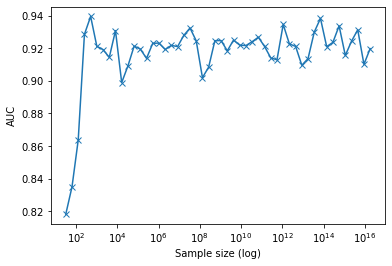

In [17]:
# Try different sample size ('max_samples' parameter) for iforest to identify a good one. Plot the relationship for the size from 2**5 to 2**14 with an exponential step 2**i.

auc_scores = []
sample_sizes = []
for i in range(5, 55):
    sample_sizes.append(2**i)
    detector_if = IsolationForest(max_samples=2**i)
    detector_if.fit(X)
    y_score = detector_if.decision_function(X)
    auc = roc_auc_score(y, y_score)
    auc_scores.append(auc)

# Plot the relationship between auc and sample size
plt.plot(sample_sizes, auc_scores, marker='x')
plt.xscale('log')
plt.xlabel('Sample size (log)')
plt.ylabel('AUC')
plt.show()

In [18]:
print(auc_scores)

[0.818251596850592, 0.8349816171576423, 0.8636480805117667, 0.9284442717901427, 0.9394334357157207, 0.9210956730734321, 0.9191197293038724, 0.9143370437872286, 0.9307545315703232, 0.8988774243205369, 0.9090757266608094, 0.9212290969292545, 0.9194280261498656, 0.9137343673228336, 0.9229560433442977, 0.9231042920729893, 0.9191705574394237, 0.9216786838901434, 0.920961644120758, 0.9278216271296383, 0.9323544076464878, 0.924459709021026, 0.9019107748386207, 0.9083768397969778, 0.9245674162606465, 0.9246466839482328, 0.9183349186870851, 0.9249286590811724, 0.9218432702338336, 0.9215806582001514, 0.923967160183659, 0.9266907011136203, 0.9210294149681599, 0.9140066609061447, 0.9128678686310532, 0.9345230747633466, 0.9225772527150695, 0.921068746263527, 0.9095083709098478, 0.9136091122745107, 0.9298257079028069, 0.938234133755449, 0.9209301790844643, 0.923545407677953, 0.9336626270400841, 0.9155175877450945, 0.9242497404134505, 0.9312616027321333, 0.9100995505340584, 0.9197151446060455]


The highest value of the auc_score is around 0.93, for max_samples 2**12. 

This model determines outputs very close to the original values.

Creating an isolation forest model for the dataset. It isolates the outliers by randomly selecting a feature from the given set of features and then randomly selecting a split value between the maximum and minimum values of the selected feature

In [19]:
# Create the iForest model
detector_if = IsolationForest()

# Train the model
detector_if.fit(X)

# Obtain anomaly score (Note that this is not the yes/no prediction as we don't know the threshold)
y_score = detector_if.decision_function(X)
print(y_score)

[0.16414358 0.16354442 0.15457951 ... 0.14965996 0.1541559  0.14730206]


In [20]:
# Evaluate using AUC (Area Under Curve)
auc = roc_auc_score(y, y_score)
print('\n AUC score: %f\n' % auc)


 AUC score: 0.897198



In [21]:
# Predict the Yes/No label. The algorithm set a default threshold. But note that this is really data-dependent
y_pred = detector_if.predict(X)
print('\n AUC score: %f\n' % roc_auc_score(y, y_pred))


 AUC score: 0.733913



Isolation Forest model provides a comparatively better value than the LOF model for this dataset too. 